# Problem :

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

# Develop an text classification model based on CNN + LSTM in Keras.

In this assignment, you will have to train two Text classification:
1) LSTM based Text Classification
2) CNN + LSTM based Text Classification

After training the two different classification, you have to compare the F1 Score on both of the model trained and report the best F1 Score for which of them.

This notebook is divided into six parts. Total : [12 Marks]

1. Calculate the average length of reviews and modifying the length of sentences in X_train , X_test, X_cv [2 Mark]
2. Implement the LSTM model [3 Marks]
3. Calculate the LSTM model F1 Score [1 Mark]
4. Implement the CNN + LSTM [3 Marks]
5. Calculate the CNN + LSTM model F1 Score [1 Mark]
6. Identify and decode 5 of the sentences misclassified by LSTM model which  were correctly classified by CNN + LSTM model [2 Mark]

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

#import the required library

# Student will have to code here

import cv2
import keras
from keras import backend as K 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D ,LSTM
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tqdm import tqdm
import os , sys
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import gmtime, strftime
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# Students will end their code here

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_cv.shape)

print(y_test)


C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of CV data: (5000,)
[0 1 1 ... 0 0 0]


Review length: 
Mean 239.05 words (176.239086)
Max length of reviews: 1854


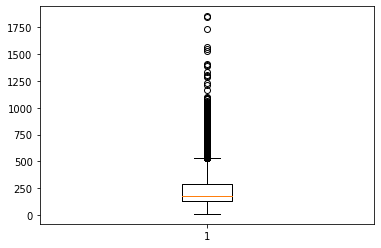

New mean 239.00 words (0.000000)


In [3]:
# truncate and pad input sequences
# Calculate the average length of reviews using the training set (X_train) and set the value to max_review_length
# truncate or pad the reviews so that length of all the reviews are same

# Summarize review length
print("Review length: ")
maxN = 0
result = [len(x) for x in X_train]
for x in X_train:
    maxN = max(maxN,len(x))
    
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
print("Max length of reviews:",maxN)
# plot review length
plt.boxplot(result)
plt.show()
average_review_length = round(np.mean(result))

X_train = sequence.pad_sequences(X_train, maxlen=average_review_length) # code to truncate or pad the reviews to the average_review_length
X_test = sequence.pad_sequences(X_test, maxlen=average_review_length)# code to truncate or pad the reviews to the average_review_length
X_cv = sequence.pad_sequences(X_cv, maxlen=average_review_length)# code to truncate or pad the reviews to the average_review_length

result = [len(x) for x in X_train]
print("New mean %.2f words (%f)" % (np.mean(result), np.std(result)))

In [4]:
# Decoding the data coded data of IMDB ( Data Understanding )
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded) 



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # i have to say the first i watched this film was about 6 years ago and i actually enjoyed it then i bought the dvd recently and upon a second viewing i wondered why i liked it the acting was awful and as usual we have the # typical # in their fake costumes the acting was awful at best tim roth did an ok job as did liam neeson but i've no idea what jessica lange was thinking br br the plot line was good but the execution was just poor i'm tired of seeing scotland portrayed like this in the films braveheart was even worse though which is this films only saving grace but seriously people didn't speak like that in those days why do all the actors have to have # accents just another film to try and capture the essence of already tired and annoying stereotypes i notice the only people on here who say this film is good are the americans and to be honest i can see why they'd like it i know they have an # for men in # however if you a

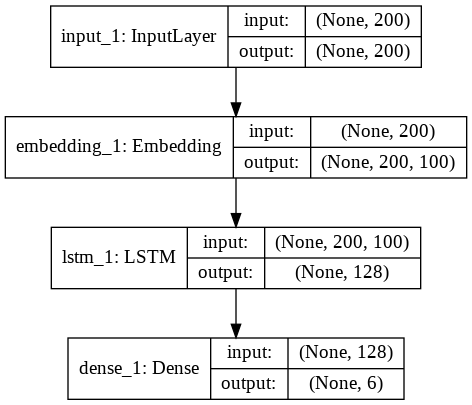

In [5]:
# Architecture Diagram for LSTM Based Classifcation but you will have to change the
# configuration/model parameters while implementing it depending on the input , output and the 
# Problem statement.

from IPython.display import Image
Image(filename='LSTM_model.png')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 239, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1181696   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,986,049
Trainable params: 1,986,049
Non-trainable params: 0
____________________________________________

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - ETA: 58s - loss: 0.6932 - accuracy: 0.492 - ETA: 46s - loss: 0.6931 - accuracy: 0.498 - ETA: 41s - loss: 0.6930 - accuracy: 0.500 - ETA: 38s - loss: 0.6929 - accuracy: 0.503 - ETA: 35s - loss: 0.6928 - accuracy: 0.503 - ETA: 33s - loss: 0.6927 - accuracy: 0.502 - ETA: 31s - loss: 0.6925 - accuracy: 0.511 - ETA: 29s - loss: 0.6924 - accuracy: 0.513 - ETA: 27s - loss: 0.6919 - accuracy: 0.523 - ETA: 26s - loss: 0.6913 - accuracy: 0.523 - ETA: 24s - loss: 0.6903 - accuracy: 0.527 - ETA: 22s - loss: 0.6901 - accuracy: 0.528 - ETA: 21s - loss: 0.6893 - accuracy: 0.532 - ETA: 19s - loss: 0.6874 - accuracy: 0.541 - ETA: 18s - loss: 0.6857 - accuracy: 0.548 - ETA: 16s - loss: 0.6835 - accuracy: 0.556 - ETA: 14s - loss: 0.6797 - accuracy: 0.564 - ETA: 13s - loss: 0.6870 - accuracy: 0.571 - ETA: 11s - loss: 0.6843 - accuracy: 0.576 - ETA: 10s - loss: 0.6826 - accuracy: 0.579 - ETA: 8s - loss

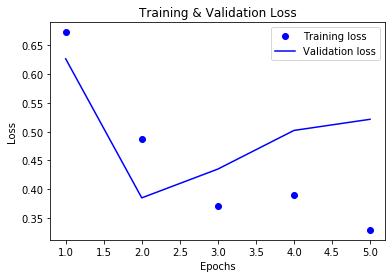

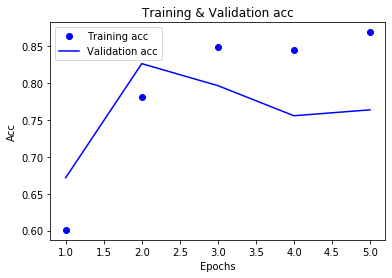

In [6]:
import tensorflow as tf

embedding_vector_length = 64
model_lstm = Sequential()

# Write the code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer
# Use appropriate activation function in respective layers

# Students will be starting their code from here:
model_lstm.add(Embedding(10000, embedding_vector_length, input_length=average_review_length))
#model_lstm.add(Flatten())
model_lstm.add(LSTM(512, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dense(1, activation = 'sigmoid'))
model_lstm.summary()

# Students will be ending their code here

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=750,verbose = 1,validation_data=(X_cv,y_cv))

# PLot the loss chart

plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title ('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# PLot the accuracy chart

plt.clf() # clear the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title ('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


In [7]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:

print("Calculating Score...")
pred=model_lstm.predict(X_test)
print(pred)
predicted_class_indices_LSTM= np.where(pred > 0.5, 1, 0)#np.argmax(pred,axis=1) #Capture predicted class indices

print(predicted_class_indices_LSTM)

#labels = test_it.class_indices.keys()
#precisions, recall, f1_score, _ = precision_recall_fscore_support(test_trues, predicted_class_indices)
precision_LSTM = precision_score(y_test, predicted_class_indices_LSTM, average="macro")
recall_LSTM = recall_score(y_test, predicted_class_indices_LSTM, average="macro")
print("Accuracy:{},Precision:{} , recall:{},f1 score:{}".format(accuracy_score(y_test, predicted_class_indices_LSTM),precision_score(y_test, predicted_class_indices_LSTM, average="macro"), recall_score(y_test, predicted_class_indices_LSTM, average="macro"), f1_score(y_test, predicted_class_indices_LSTM, average="macro")))


Calculating Score...
[[0.9069854 ]
 [0.960521  ]
 [0.7505539 ]
 ...
 [0.27224803]
 [0.06939938]
 [0.88677794]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
Accuracy:0.76488,Precision:0.7927687563776018 , recall:0.76488,f1 score:0.759144098006989


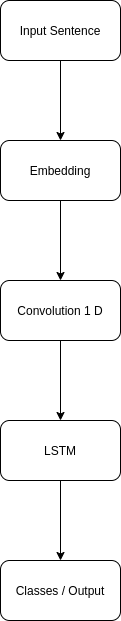

In [8]:
# High Level Model Architecture
from IPython.display import Image
Image(filename='1_VGtBedNuZyX9E-07gnm2Yg.png')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 239, 64)           640000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 232, 32)           16416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 116, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1116160   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

20000/20000 [==============================] - ETA: 20s - loss: 0.1883 - accuracy: 0.936 - ETA: 19s - loss: 0.1896 - accuracy: 0.936 - ETA: 19s - loss: 0.1997 - accuracy: 0.927 - ETA: 18s - loss: 0.1939 - accuracy: 0.928 - ETA: 18s - loss: 0.1935 - accuracy: 0.929 - ETA: 17s - loss: 0.1842 - accuracy: 0.933 - ETA: 16s - loss: 0.1818 - accuracy: 0.932 - ETA: 15s - loss: 0.1825 - accuracy: 0.931 - ETA: 14s - loss: 0.1822 - accuracy: 0.931 - ETA: 13s - loss: 0.1805 - accuracy: 0.932 - ETA: 13s - loss: 0.1817 - accuracy: 0.932 - ETA: 12s - loss: 0.1822 - accuracy: 0.932 - ETA: 11s - loss: 0.1830 - accuracy: 0.931 - ETA: 10s - loss: 0.1831 - accuracy: 0.930 - ETA: 9s - loss: 0.1852 - accuracy: 0.930 - ETA: 9s - loss: 0.1851 - accuracy: 0.93 - ETA: 8s - loss: 0.1866 - accuracy: 0.92 - ETA: 7s - loss: 0.1845 - accuracy: 0.93 - ETA: 6s - loss: 0.1845 - accuracy: 0.93 - ETA: 5s - loss: 0.1877 - accuracy: 0.92 - ETA: 5s - loss: 0.1880 - accuracy: 0.92 - ETA: 4s - loss: 0.1885 - accuracy: 0.92 - 

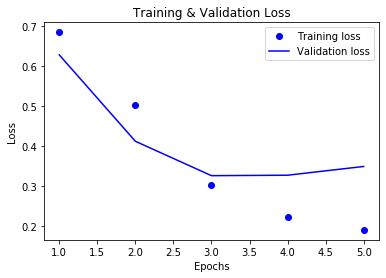

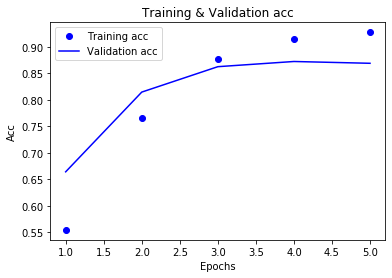

In [9]:

# Import Cov1D
from keras.layers import Conv1D,MaxPooling1D
# create the model
embedding_vector_length = 64
model_cnn_lstm = Sequential()

# Students will be starting their code from here:

# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer
# Use appropriate activation function in respective layers

model_cnn_lstm.add(Embedding(10000, embedding_vector_length, input_length=average_review_length))
#model_lstm.add(Flatten())
model_cnn_lstm.add(Conv1D(filters=32,kernel_size=8,strides=1,activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size = 2))
model_cnn_lstm.add(LSTM(512, dropout = 0.3, recurrent_dropout = 0.3))
model_cnn_lstm.add(Dense(256, activation = 'relu'))
model_cnn_lstm.add(Dropout(0.3))
model_cnn_lstm.add(Dense(128, activation = 'relu'))
model_cnn_lstm.add(Dense(1, activation = 'sigmoid'))
model_cnn_lstm.summary()


# Students will be ending their code here

model_cnn_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn_lstm.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history = model_cnn_lstm.fit(X_train, y_train, epochs=5, batch_size=750,verbose = 1,validation_data=(X_cv,y_cv))

# PLot the loss chart

plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title ('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# PLot the accuracy chart

plt.clf() # clear the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title ('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()



In [10]:
# Final evaluation of the CNN + RNN model using the test data
# Students will be starting their code from here:

print("Calculating Score...")
pred=model_cnn_lstm.predict(X_test)
print(pred)
predicted_class_indices_LSTMCNN= np.where(pred > 0.5, 1, 0)#np.argmax(pred,axis=1) #Capture predicted class indices

print(predicted_class_indices_LSTMCNN)

#labels = test_it.class_indices.keys()
#precisions, recall, f1_score, _ = precision_recall_fscore_support(test_trues, predicted_class_indices)
precision_LSTM = precision_score(y_test, predicted_class_indices_LSTMCNN, average="macro")
recall_LSTM = recall_score(y_test, predicted_class_indices_LSTMCNN, average="macro")
print("Accuracy:{},Precision:{} , recall:{},f1 score:{}".format(accuracy_score(y_test, predicted_class_indices_LSTMCNN),precision_score(y_test, predicted_class_indices_LSTMCNN, average="macro"), recall_score(y_test, predicted_class_indices_LSTMCNN, average="macro"), f1_score(y_test, predicted_class_indices_LSTMCNN, average="macro")))



Calculating Score...
[[0.27157328]
 [0.98832244]
 [0.9956579 ]
 ...
 [0.02721538]
 [0.11272576]
 [0.35104665]]
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
Accuracy:0.8634,Precision:0.8643944388369281 , recall:0.8634,f1 score:0.8633067404222027


In [11]:
# Identify and decode 5 of the sentences misclassified by LSTM model which  were correctly classified by CNN + LSTM model
# Students will be starting their code from here:

count_of_words = 0
word_arr = pd.DataFrame()
print("5 sentences misclassified by LSTM but correctly classified by CNN+LSTM are:")
for y in range(len(y_test)):
    if y_test[y] == predicted_class_indices_LSTMCNN[y] and y_test[y] != predicted_class_indices_LSTM[y]:
        print('\nGround Truth:{}, LSTM prediction:{} , LSTMCNN Prediction:{}\n'.format(y_test[y],predicted_class_indices_LSTM[y],predicted_class_indices_LSTMCNN[y]))
        count_of_words = count_of_words + 1
        # Decoding the data coded data of IMDB ( Data Understanding )
        decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_test[y]] )
        print("Sentence:\n",decoded) 
    if count_of_words == 5:
        break

    


5 sentences misclassified by LSTM but correctly classified by CNN+LSTM are:

Ground Truth:0, LSTM prediction:[1] , LSTMCNN Prediction:[0]

Sentence:
 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # please give this one a miss br br # # and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite # so all you madison fans give this a miss

Ground Truth:0, LSTM prediction:[1] , LSTMCNN Prediction:[0]

Sentence:
 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #